In [96]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [97]:
df1=pd.read_csv('fear_greed_index.csv')
df1.head(5)

,timestamp,value,classification,date
0,1517463000,30,Fear,2018-02-01
1,1517549400,15,Extreme Fear,2018-02-02
2,1517635800,40,Fear,2018-02-03
3,1517722200,24,Extreme Fear,2018-02-04
4,1517808600,11,Extreme Fear,2018-02-05


In [98]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2644 entries, 0 to 2643
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   timestamp       2644 non-null   int64 
 1   value           2644 non-null   int64 
 2   classification  2644 non-null   object
 3   date            2644 non-null   object
dtypes: int64(2), object(2)
memory usage: 82.8+ KB


In [99]:
df2=pd.read_csv('historical_data.csv')
df2.head(5)

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12


In [100]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211224 entries, 0 to 211223
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Account           211224 non-null  object 
 1   Coin              211224 non-null  object 
 2   Execution Price   211224 non-null  float64
 3   Size Tokens       211224 non-null  float64
 4   Size USD          211224 non-null  float64
 5   Side              211224 non-null  object 
 6   Timestamp IST     211224 non-null  object 
 7   Start Position    211224 non-null  float64
 8   Direction         211224 non-null  object 
 9   Closed PnL        211224 non-null  float64
 10  Transaction Hash  211224 non-null  object 
 11  Order ID          211224 non-null  int64  
 12  Crossed           211224 non-null  bool   
 13  Fee               211224 non-null  float64
 14  Trade ID          211224 non-null  float64
 15  Timestamp         211224 non-null  float64
dtypes: bool(1), float64(

In [101]:
df1['date']=pd.to_datetime(df1['date'])
df1['date']=df1['date'].dt.date

In [102]:
df2['Timestamp IST']=pd.to_datetime(df2['Timestamp IST'],format='%d-%m-%Y %H:%M')
df2['Timestamp IST']=df2['Timestamp IST'].dt.date

In [103]:
classification_map={
    'Extreme Fear':0,
    'Fear':1,
    'Neutral':2,
    'Greed':3,
    'Extreme Greed':4
}

In [104]:
df1['classification_map']=df1['classification'].map(classification_map)


In [105]:
fg_df=df1[['date','classification_map','classification']]

In [106]:
fg_df.head()

,date,classification_map,classification
0,2018-02-01,1,Fear
1,2018-02-02,0,Extreme Fear
2,2018-02-03,1,Fear
3,2018-02-04,0,Extreme Fear
4,2018-02-05,0,Extreme Fear


In [107]:
h_df=df2[['Account','Coin','Execution Price','Size Tokens','Size USD','Side','Closed PnL','Direction','Timestamp IST']]

In [108]:
h_df.head()

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Closed PnL,Direction,Timestamp IST
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,0.0,Buy,2024-12-02
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,0.0,Buy,2024-12-02
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,0.0,Buy,2024-12-02
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,0.0,Buy,2024-12-02
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,0.0,Buy,2024-12-02


In [109]:
merge_df=pd.merge(h_df,fg_df,left_on='Timestamp IST',right_on='date',how='left')
merge_df.head()

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Closed PnL,Direction,Timestamp IST,date,classification_map,classification
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,0.0,Buy,2024-12-02,2024-12-02,4.0,Extreme Greed
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,0.0,Buy,2024-12-02,2024-12-02,4.0,Extreme Greed
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,0.0,Buy,2024-12-02,2024-12-02,4.0,Extreme Greed
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,0.0,Buy,2024-12-02,2024-12-02,4.0,Extreme Greed
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,0.0,Buy,2024-12-02,2024-12-02,4.0,Extreme Greed


In [110]:
merge_df.to_csv('merge_df.csv',index=False)

In [111]:
merge_df['pnl']=merge_df['Closed PnL'].apply(lambda x:'Profit' if x>0 else('Loss' if x<0 else 'Zero'))

In [112]:
merge_df['Side'].unique()

array(['BUY', 'SELL'], dtype=object)

In [113]:
merge_df['Side_binary']=merge_df['Side'].apply(lambda x: 1 if x=='BUy' else 0)

In [114]:
merge_df['Normalized_pnl']=merge_df.apply(lambda x : x['Closed PnL'] / x['Size USD'] if x['Size USD'] else 0 ,axis=1)

In [115]:
merge_df.head()

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Closed PnL,Direction,Timestamp IST,date,classification_map,classification,pnl,Side_binary,Normalized_pnl
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,0.0,Buy,2024-12-02,2024-12-02,4.0,Extreme Greed,Zero,0,0.0
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,0.0,Buy,2024-12-02,2024-12-02,4.0,Extreme Greed,Zero,0,0.0
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,0.0,Buy,2024-12-02,2024-12-02,4.0,Extreme Greed,Zero,0,0.0
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,0.0,Buy,2024-12-02,2024-12-02,4.0,Extreme Greed,Zero,0,0.0
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,0.0,Buy,2024-12-02,2024-12-02,4.0,Extreme Greed,Zero,0,0.0


In [116]:
per = merge_df.groupby(['Account', 'Timestamp IST', 'classification', 'classification_map']).agg({
    'Closed PnL': ['sum', 'mean'],
    'Size USD': ['sum', 'mean'],
    'Side_binary': 'mean',
    'pnl': lambda x: (x == 'Profit').sum(),
    'Account': 'count'
}).reset_index()

per.columns = [
    'Account', 'trade_date', 'classification', 'sentiment_score',
    'Total_PnL', 'Avg_PnL',
    'Total_Trade_Size', 'Avg_Trade_Size',
    'Buy_Ratio',
    'Profit_Trades',
    'Total_Trades'
]

per['Profit_Rate'] = per['Profit_Trades'] / per['Total_Trades']
per.head()

,Account,trade_date,classification,sentiment_score,Total_PnL,Avg_PnL,Total_Trade_Size,Avg_Trade_Size,Buy_Ratio,Profit_Trades,Total_Trades,Profit_Rate
0,0x083384f897ee0f19899168e3b1bec365f52a9012,2024-11-11,Extreme Greed,4.0,0.0,0.000000,900880.13,5089.718249,0.0,0,177,0.000000
1,0x083384f897ee0f19899168e3b1bec365f52a9012,2024-11-17,Extreme Greed,4.0,0.0,0.000000,542413.18,7976.664412,0.0,0,68,0.000000
2,0x083384f897ee0f19899168e3b1bec365f52a9012,2024-11-18,Extreme Greed,4.0,0.0,0.000000,949380.00,23734.500000,0.0,0,40,0.000000
3,0x083384f897ee0f19899168e3b1bec365f52a9012,2024-11-22,Extreme Greed,4.0,-21227.0,-1768.916667,338240.00,28186.666667,0.0,0,12,0.000000
4,0x083384f897ee0f19899168e3b1bec365f52a9012,2024-11-26,Extreme Greed,4.0,1603.1,59.374074,465700.00,17248.148148,0.0,12,27,0.444444


/tmp/ipython-input-94570062.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=per, x='classification', y='Avg_PnL', palette='coolwarm')


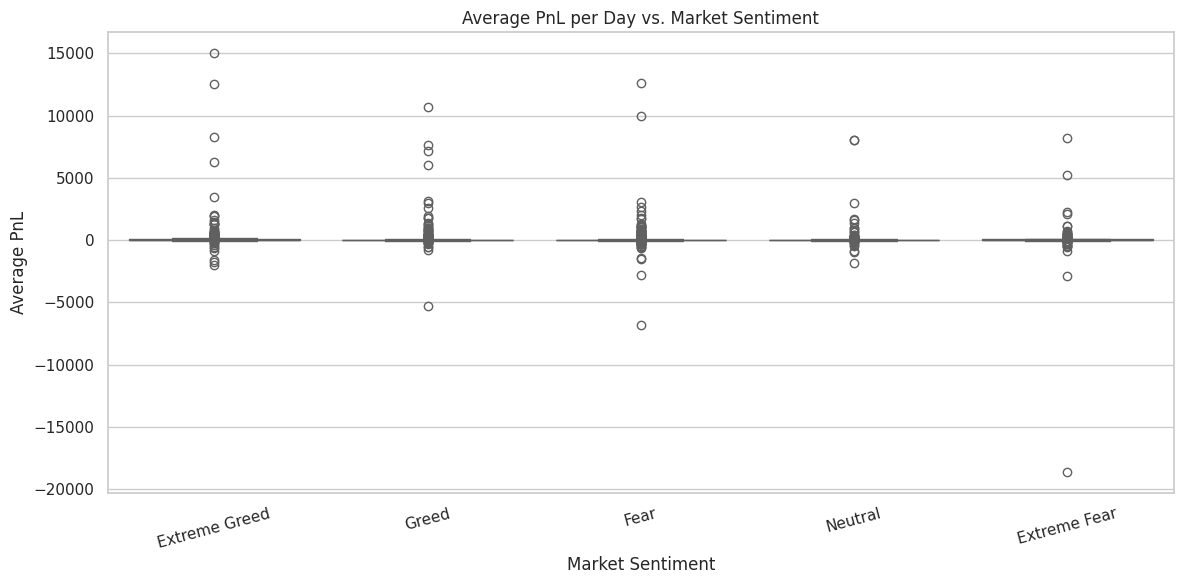

/tmp/ipython-input-94570062.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=per, x='classification', y='Profit_Rate', palette='viridis')


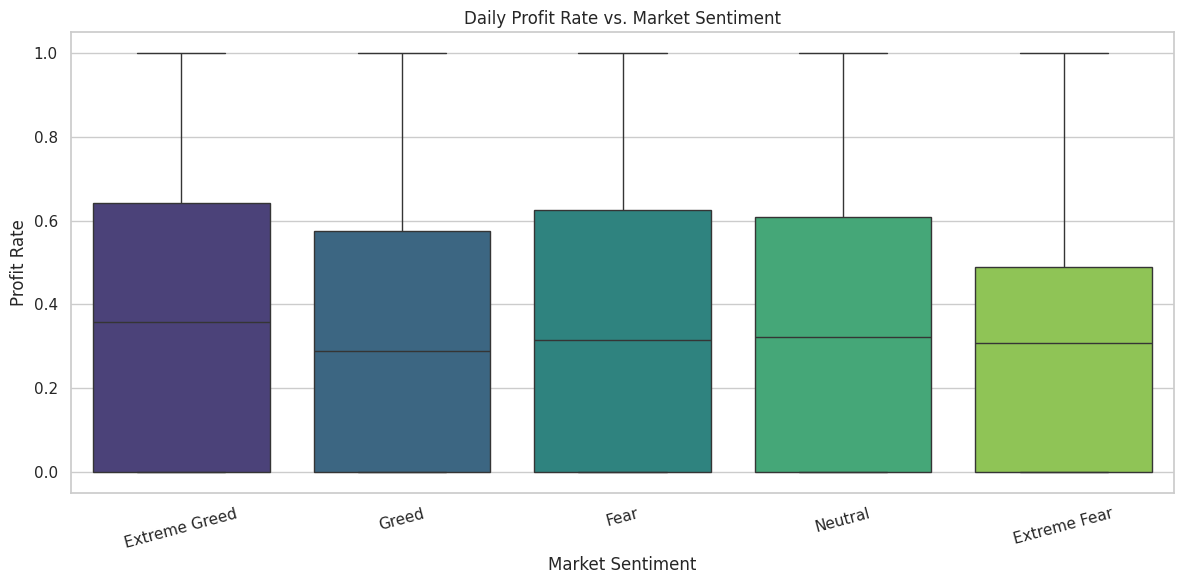

In [118]:
sns.set_theme(style="whitegrid")
plt.rcParams["figure.figsize"] = (12, 6)

# Plot 1: Average PnL per Sentiment Class
plt.figure()
sns.boxplot(data=per, x='classification', y='Avg_PnL', palette='coolwarm')
plt.title('Average PnL per Day vs. Market Sentiment')
plt.ylabel('Average PnL')
plt.xlabel('Market Sentiment')
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()

# Plot 2: Profit Rate vs. Sentiment Class
plt.figure()
sns.boxplot(data=per, x='classification', y='Profit_Rate', palette='viridis')
plt.title('Daily Profit Rate vs. Market Sentiment')
plt.ylabel('Profit Rate')
plt.xlabel('Market Sentiment')
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()

